<a href="https://colab.research.google.com/github/nousintasnia/Noshin-Tasnia-s-Machine-learning-project/blob/main/ASD_Screening_data_analytics(Noshin_Tasnia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving autism_screening.csv to autism_screening (1).csv


In [ ]:
conda install -c vpython vpython

SyntaxError: ignored

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline


data = pd.read_csv('autism_screening.csv')
display(data.head(n=5))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)   # setting to display all columns
pd.options.plotting.backend = "plotly"


In [ ]:
df = pd.read_csv("autism_screening.csv")

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [ ]:
print(f'Shape of dataframe is: {df.shape}')

Shape of dataframe is: (704, 21)


In [ ]:
pd.DataFrame(df.dtypes,
             columns = ["Data Type"])

,Data Type
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64


In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [ ]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"]).style.bar(color = "#84A9AC")

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
print(f"Maximum age is data: {df['age'].max()}\n")

print(f"Minimum age is data: {df['age'].min()}")

Maximum age is data: 383.0

Minimum age is data: 17.0


In [ ]:
df[df['age'] == df['age'].max()]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,383.0,f,Pasifika,no,no,New Zealand,no,1.0,18 and more,Self,NO


In [ ]:
# dropping record number 52
df.drop(index = 52, inplace = True)

# resetting index
df.reset_index(inplace = True)

In [ ]:
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))

In [ ]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

,Missing Values
index,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [ ]:
for col in df.select_dtypes('O').columns:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n\n')

-------------------------------
Column name: gender

Unique values:
['f' 'm']


-------------------------------
Column name: ethnicity

Unique values:
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']


-------------------------------
Column name: jundice

Unique values:
['no' 'yes']


-------------------------------
Column name: austim

Unique values:
['no' 'yes']


-------------------------------
Column name: contry_of_res

Unique values:
['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran'
 'Costa Rica' 'Germany' 'Mexico' 'Russia' 'Armenia' 'I

In [ ]:
df['ethnicity'] = df['ethnicity'].replace('?', 'Others')

In [ ]:
df['ethnicity'] = df['ethnicity'].replace('others', 'Others')

In [ ]:
df['ethnicity'].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish'], dtype=object)

In [ ]:
df['relation'] = df['relation'].replace('?', df['relation'].mode()[0])

In [ ]:
df['relation'].unique()

array(['Self', 'Parent', 'Health care professional', 'Relative', 'Others'],
      dtype=object)

In [ ]:
fig = px.histogram(df, x="gender",
                   template='plotly_dark',
                   color_discrete_sequence = ["#84A9AC"])

fig.update_layout(title = "<b>Counts of Male and Female</b>",
                  title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

In [ ]:
fig = px.pie(df, names = "gender",
             title = "<b>Counts of Male and Female</b>",
             hole = 0.5, template = "plotly_dark")

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

In [ ]:
df['Class/ASD'].value_counts()

NO     514
YES    189
Name: Class/ASD, dtype: int64

In [ ]:
fig = px.pie(df, names = "Class/ASD",
             title = "<b>Autism Spectrum Disorder Counts</b>",
             template = "plotly_dark")

fig.update_traces(textposition='inside',
                  textinfo = 'percent+label',
                  marker = dict(line = dict(color = '#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

In [ ]:
fig = df.groupby('gender').agg({'age':'mean'}).plot(kind='bar',
                                                    template = "seaborn",
                                                    labels = {"gender":"Gender",
                                                              "value":"Age"},
                                                    color_discrete_sequence = ["#84b1b5"]);

fig.update_layout(title = "<b>Average Age</b>\n",
                  title_font = dict(size = 20),)


fig.show()

In [ ]:
fig = df[df['Class/ASD'] == "YES"]['gender'].value_counts().plot(kind = 'bar',
                                                                 template = "seaborn",
                                                                 color_discrete_sequence = ["#84b1b5"],
                                                                 labels = {"index":"Gender",
                                                                          "value":"Counts"});

fig.update_layout(title = "<b>Gender Count of ASD Patients</b>\n",
                  title_font = dict(size = 20), width = 900)

fig.show()

In [ ]:
asd_patients_country_wise = pd.DataFrame(df[df['Class/ASD'] == "YES"]['contry_of_res'].value_counts()).rename({"contry_of_res":"ASD_Patient_Counts"}, axis = 1)

In [ ]:
asd_patients_country_wise.style.bar(color="#84A9AC")

,ASD_Patient_Counts
United States,53
United Kingdom,29
New Zealand,15
Australia,12
Canada,10
India,6
France,5
Brazil,5
Malaysia,4
Mexico,4


In [ ]:
asd_patients_country_wise.index

Index(['United States', 'United Kingdom', 'New Zealand', 'Australia', 'Canada',
       'India', 'France', 'Brazil', 'Malaysia', 'Mexico', 'Italy',
       'Netherlands', 'Austria', 'Russia', 'United Arab Emirates', 'Sweden',
       'Afghanistan', 'Germany', 'Ireland', 'South Africa', 'Jordan', 'Spain',
       'Uruguay', 'Nepal', 'Finland', 'AmericanSamoa', 'Pakistan', 'Belgium',
       'Viet Nam', 'Argentina', 'Saudi Arabia', 'Bangladesh', 'Romania',
       'Sierra Leone', 'China', 'Bahamas', 'Cyprus'],
      dtype='object')

In [ ]:
fig = px.bar(data_frame = asd_patients_country_wise,
             x = asd_patients_country_wise.index,
             y = "ASD_Patient_Counts",
             labels = {"index" : "Country"},
             color_discrete_sequence = px.colors.qualitative.D3_r,
             template='plotly_dark')

fig.update_xaxes(tickangle = 310)

fig.update_layout(title={
        'text': "<b>Counts of ASD Patients Country Wise</b>",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [ ]:
label = asd_patients_country_wise.index
value = asd_patients_country_wise['ASD_Patient_Counts']

fig = go.Figure(data=[go.Pie(labels = label,
                             values = value,
                             rotation = 90)])

fig.update_traces(textposition = 'inside',
                  textinfo = 'percent+label',
                  marker = dict(line = dict(color = '#000000', width = 1.5)))

fig.update_layout(title_text='<b>Country Wise Counts of ASD Patients</b>',
                  title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15,
                  template='plotly_dark')

fig.show()

In [ ]:
df.drop(['index','age_desc'], axis = 1, inplace = True)

In [ ]:
X = df.drop("Class/ASD", axis = 1)    # select all other feature except "Class/ASD" for training
Y = df['Class/ASD']

In [ ]:
X = pd.get_dummies(X)
Y = pd.get_dummies(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (527, 102)
Shape of Y_train is: (527, 2)

Shape of X_test is: (176, 102)
Shape of Y_test is: (176, 2)


In [ ]:
input_dim = X.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
# compiling model
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 824       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


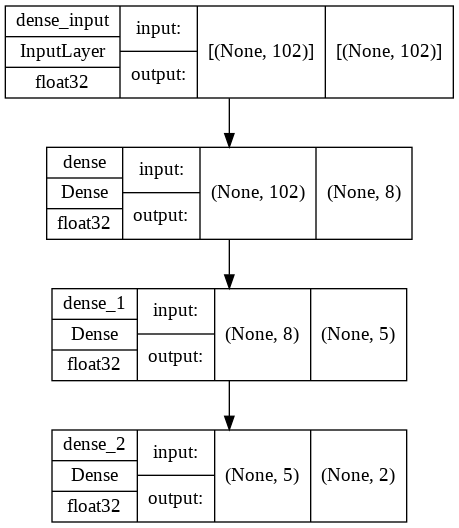

In [ ]:
plot_model(model,
           show_dtype = True,
           show_layer_names = True,
           show_shapes = True)

In [ ]:
result = model.fit(X_train, Y_train, epochs = 20, batch_size = 10)

Epoch 1/20
53/53 [==============================] - 1s 2ms/step - loss: 0.6887 - accuracy: 0.6907
Epoch 2/20
53/53 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.7230
Epoch 3/20
53/53 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.7230
Epoch 4/20
53/53 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.7230
Epoch 5/20
53/53 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7230
Epoch 6/20
53/53 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.7230
Epoch 7/20
53/53 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7230
Epoch 8/20
53/53 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7230
Epoch 9/20
53/53 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7230
Epoch 10/20
53/53 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.7230
Epoch 11/20
53/53 [

In [ ]:
acc = result.history['accuracy']
loss = result.history['loss']

epoch = [i + 1 for i in range(len(acc))]

In [ ]:
acc_loss_df = pd.DataFrame({"Accuracy" : acc,
                            "Loss" : loss,
                            "Epoch" : epoch})

acc_loss_df.style.bar(color = '#84A9AC',
                      subset = ['Accuracy','Loss'])

,Accuracy,Loss,Epoch
0,0.690702,0.688708,1
1,0.722960,0.679191,2
2,0.722960,0.670753,3
3,0.722960,0.662931,4
4,0.722960,0.655877,5
5,0.722960,0.649348,6
6,0.722960,0.643473,7
7,0.722960,0.638025,8
8,0.722960,0.633098,9
9,0.722960,0.628707,10


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Accuracy'],
                         mode='lines+markers',
                         name='Accuracy'))

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Loss'],
                         mode='lines+markers',
                         name = 'Loss'))

fig.update_layout(title = {'text': "<b>Training Accuracy Vs Training Loss</b>\n",
                           'xanchor': 'center',
                           'yanchor': 'top',
                           'y':0.9,'x':0.5,},
                  xaxis_title="Epoch",
                  yaxis_title = "Accuracy / Loss",
                  title_font = dict(size = 20))

fig.layout.template = 'plotly_dark'

fig.show()

In [ ]:
loss, acc = model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.5809 - accuracy: 0.7557


In [ ]:
print(f"Accuracy on unseen data is: { np.round(acc, 2) }")
print(f'Loss on unseen data is: { np.round(loss, 2) }')

Accuracy on unseen data is: 0.76
Loss on unseen data is: 0.58


In [ ]:
prediction = model.predict(X_test)
prediction = np.argmax(prediction, axis = 1)

In [ ]:
print(accuracy_score(Y_test[['YES']], prediction))

0.7556818181818182


In [ ]:
print(classification_report(Y_test[['YES']], prediction))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       133
           1       0.00      0.00      0.00        43

    accuracy                           0.76       176
   macro avg       0.38      0.50      0.43       176
weighted avg       0.57      0.76      0.65       176



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

